# Movie success prediction
The main goal of this project is to analyze and improve the classification of movies based on the previous success factor of their participants, using machine learning techniques. The work involves training a model to predict movie success and then evaluating the model's performance. Additionally, it includes analyzing the importance of different features in making these predictions.

Key Components:

1. Data Preparation and Preprocessing:
Initial Parsing: The project begins with loading movie datasets that include various attributes such as actors, directors,    producers, and genres. This step ensures that the data is read into a format suitable for processing (e.g., DataFrame).
   
    Data Cleaning: The raw data often contains missing values, inconsistencies, or formatting issues. Cleaning involves handling these issues by filling missing values, correcting data types, and ensuring that the data is consistent and ready for further analysis.
   
    Feature Engineering: Features related to actors, directors, and producers are aggregated to a single string to facilitate one-hot encoding. This step is crucial for converting categorical features into a format that can be used by machine learning algorithms.

3. Model Training:
Classifier Setup: A LinearSVC classifier is used for the classification task. This model helps in predicting the success of movies based on the provided features.
   
    Pipeline Creation: A Pipeline is created to streamline the process. It integrates preprocessing steps (such as one-hot encoding of categorical features) and the classifier into a single workflow, ensuring that all data transformations and model training are handled consistently.
   
    Regression Model: In addition to classification, a regression model is applied to predict the revenue of the movies. This model helps in understanding the financial potential of the movies based on various features.

4. Model Evaluation:
Performance Metrics: After training the model, it is evaluated on a test dataset. Performance is assessed using accuracy, classification reports, and confusion matrices, which provide insights into how well the model predicts movie success.
For revenue prediction the goodness of the fir is used. 
   
    Error Analysis: The evaluation includes identifying correctly and incorrectly classified movies, providing an understanding of the model's strengths and weaknesses.

6. Feature Importance Analysis:
Extracting Importance: The importance of different features is analyzed based on the model's coefficients. This helps in understanding which features (actors, directors, producers, and genres) are most influential in predicting movie success.
   
    Aggregation and Visualization: Feature importance scores are aggregated by feature type (e.g., actors, directors) to identify top contributors. This information is useful for interpreting the model and making data-driven decisions about movie success factors.


In [1456]:
import pandas as pd
import time
import ast
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openai
import time
import joblib

In [2]:
pd.set_option("max_colwidth",None)
pd.set_option('display.max_columns', None)

# Collect the data

Link with the movies dataset

https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

In [4]:
movies = pd.read_csv("archive/movies_metadata.csv",  encoding='latin-1')
movies

/var/folders/s9/50q4dtjx43v2thzdkrbxn8hh0000gn/T/ipykernel_75750/3814668501.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("archive/movies_metadata.csv",  encoding='latin-1')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'FranÃ§ais'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcÃ©e opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jp

## Parse and clean the data

In [8]:
# Convert string representation to list of dictionaries
def safe_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except (ValueError, SyntaxError):
        return x

movies['genres'] = movies['genres'].apply(safe_eval)
movies['production_companies'] = movies['production_companies'].apply(safe_eval)
movies['production_countries'] = movies['production_countries'].apply(safe_eval)

# Extract and join names from genres
def extract_and_join_genre_names(genres):
    return ', '.join(genre['name'] for genre in genres) if isinstance(genres, list) else ''

movies['genre_names'] = movies['genres'].apply(extract_and_join_genre_names)

# Extract and join names from production companies
def extract_and_join_company_names(companies):
    return ', '.join(company['name'] for company in companies) if isinstance(companies, list) else ''

movies['production_company_names'] = movies['production_companies'].apply(extract_and_join_company_names)

# Extract and join names from production countries
def extract_and_join_country_names(countries):
    return ', '.join(country['name'] for country in countries) if isinstance(countries, list) else ''

movies['production_country_names'] = movies['production_countries'].apply(extract_and_join_country_names)

In [9]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre_names,production_company_names,production_country_names
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"Animation, Comedy, Family",Pixar Animation Studios,United States of America
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'FranÃ§ais'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Communications",United States of America
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcÃ©e opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,False,6.5,92.0,"Romance, Comedy","Warner Bros., Lancaster Gate",United States of America
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]","[{'iso_3166_1': 'US', 'name': 'United

In [12]:
movies = movies[['original_language','original_title','popularity','budget','revenue', 'overview',
                 'vote_average','vote_count','genre_names','production_company_names','production_country_names']]
movies

,original_language,original_title,popularity,budget,revenue,overview,vote_average,vote_count,genre_names,production_company_names,production_country_names
0,en,Toy Story,21.946943,30000000,373554033.0,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",7.7,5415.0,"Animation, Comedy, Family",Pixar Animation Studios,United States of America
1,en,Jumanji,17.015539,65000000,262797249.0,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",6.9,2413.0,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Communications",United States of America
2,en,Grumpier Old Men,11.7129,0,0.0,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcÃ©e opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",6.5,92.0,"Romance, Comedy","Warner Bros., Lancaster Gate",United States of America
3,en,Waiting to Exhale,3.859495,16000000,81452156.0,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",6.1,34.0,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,United States of America
4,en,Father of the Bride Part II,8.387519,0,76578911.0,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own.",5.7,173.0,Comedy,"Sandollar Productions, Touchstone Pictures",United States of America
...,...,...,...,...,...,...,...,...,...,...,...
45461,fa,Ø±Ú¯ Ø®ÙØ§Ø¨,0.072051,0,0.0,Rising and falling between a man and woman.,4.0,1.0,"Drama, Family",,Iran
45462,tl,Siglo ng Pagluluwal,0.178241,0,0.0,An artist struggles to finish his work while a storyline about a cult plays in his head.,9.0,3.0,Drama,Sine Olivia,Philippines
45463,en,Betrayal,0.903007,0,0.0,"When one of her hits goes wrong, a professional assassin ends up with a suitcase full of a million dollars belonging to a mob boss ...",3.8,6.0,"Action, Drama, Thriller",American World Pictures,United States of America
45464,en,Satana likuyushchiy,0.003503,0,0.0,"In a small town live two brothers, one a minister and the other one a hunchback painter of the chapel who lives with his wife. One dreadful and stormy night, a stranger knocks at the door asking for shelter. The stranger talks about all the good things of the earthly life the minister is missing because of his puritanical faith. The minister comes to accept the stranger's viewpoint but it is others who will pay the consequences because the minister will discover the human pleasures thanks to, ehem, his sister- in -lawâ¦ The tormented minister and his cuckolded brother will die in a strange accident in the chapel and later an infant will be born from the minister's adulterous relationship.",0.0,0.0,,Yermoliev,Russia


In [14]:
movies = movies[~movies['budget'].str.endswith('.jpg')]

In [16]:
movies['budget'] = movies['budget'].astype(str).astype(float)
movies['revenue'] = movies['revenue'].astype(str).astype(float)

/var/folders/s9/50q4dtjx43v2thzdkrbxn8hh0000gn/T/ipykernel_75750/461000462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['budget'] = movies['budget'].astype(str).astype(float)
/var/folders/s9/50q4dtjx43v2thzdkrbxn8hh0000gn/T/ipykernel_75750/461000462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['revenue'] = movies['revenue'].astype(str).astype(float)


In [18]:
movies = movies[(movies['budget']!=0)|(movies['revenue']!=0)]
movies = movies[(movies['budget']!=0.0)|(movies['revenue']!=0.0)]
movies

,original_language,original_title,popularity,budget,revenue,overview,vote_average,vote_count,genre_names,production_company_names,production_country_names
0,en,Toy Story,21.946943,30000000.0,373554033.0,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",7.7,5415.0,"Animation, Comedy, Family",Pixar Animation Studios,United States of America
1,en,Jumanji,17.015539,65000000.0,262797249.0,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",6.9,2413.0,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Communications",United States of America
3,en,Waiting to Exhale,3.859495,16000000.0,81452156.0,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",6.1,34.0,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,United States of America
4,en,Father of the Bride Part II,8.387519,0.0,76578911.0,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own.",5.7,173.0,Comedy,"Sandollar Productions, Touchstone Pictures",United States of America
5,en,Heat,17.924927,60000000.0,187436818.0,"Obsessive master thief, Neil McCauley leads a top-notch crew on various insane heists throughout Los Angeles while a mentally unstable detective, Vincent Hanna pursues him without rest. Each man recognizes and respects the ability and the dedication of the other even though they are aware their cat-and-mouse game may end in violence.",7.7,1886.0,"Action, Crime, Drama, Thriller","Regency Enterprises, Forward Pass, Warner Bros.",United States of America
...,...,...,...,...,...,...,...,...,...,...,...
45402,ru,ÐÐ¾ÑÐ¿Ð¾ÑÐ°ÑÐ¸Ð²,0.52437,2000000.0,0.0,"Igor, a furniture store manager, tries to figure out what happened during the corporate event which resulted his store to be completely destroyed.",3.5,4.0,Comedy,Enjoy Movies,Russia
45408,ru,ÐÐ°ÑÑ,0.380933,2000000.0,0.0,"Somewhere deep, deep in Russia there is a town called Marks (named after Karl Marks, founder of Communism theory) where all people are working on toy factory and receiving their wages as toys. News from other cities are arriving on very rare occasion. One morning, Boris, a former boxing who is running from something, wakes up in train and see four letters MAR_S. From his first steps he starts to meet new people as Gregori, young man with a dream who is in love with local librarian, Greta, whose dream is to get out from this god-forgotten town. With each new step, he is meeting new people, but the past is hard to escape",5.0,2.0,Comedy,,
45409,en,Dikari,0.903061,800000.0,1328612.0,"The sea, August, interesting and simple people. They tan, swim, play volleyball, basketball, drink, dance and then find someone to spend the night with. Many grew out of their student phase and can afford a more comfortable holiday but when July comes they grab a tent, jump into their cars and come here. Here, nobody talks about work and the size of your wallet means nothing.",5.8,6.0,"Comedy, Drama",,
45412,en,ÐÑÐ¾ Ð»Ñ

In [24]:
movies = movies[movies['budget']!=0.0]
movies = movies[movies['revenue']!=0.0]
movies

,original_language,original_title,popularity,budget,revenue,overview,vote_average,vote_count,genre_names,production_company_names,production_country_names
0,en,Toy Story,21.946943,30000000.0,373554033.0,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",7.7,5415.0,"Animation, Comedy, Family",Pixar Animation Studios,United States of America
1,en,Jumanji,17.015539,65000000.0,262797249.0,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",6.9,2413.0,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Communications",United States of America
3,en,Waiting to Exhale,3.859495,16000000.0,81452156.0,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",6.1,34.0,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,United States of America
5,en,Heat,17.924927,60000000.0,187436818.0,"Obsessive master thief, Neil McCauley leads a top-notch crew on various insane heists throughout Los Angeles while a mentally unstable detective, Vincent Hanna pursues him without rest. Each man recognizes and respects the ability and the dedication of the other even though they are aware their cat-and-mouse game may end in violence.",7.7,1886.0,"Action, Crime, Drama, Thriller","Regency Enterprises, Forward Pass, Warner Bros.",United States of America
8,en,Sudden Death,5.23158,35000000.0,64350171.0,"International action superstar Jean Claude Van Damme teams with Powers Boothe in a Tension-packed, suspense thriller, set against the back-drop of a Stanley Cup game.Van Damme portrays a father whose daughter is suddenly taken during a championship hockey game. With the captors demanding a billion dollars by game's end, Van Damme frantically sets a plan in motion to rescue his daughter and abort an impending explosion before the final buzzer...",5.5,174.0,"Action, Adventure, Thriller","Universal Pictures, Imperial Entertainment, Signature Entertainment",United States of America
...,...,...,...,...,...,...,...,...,...,...,...
45250,ta,à®à®¿à®µà®¾à®à®¿,1.323587,12000000.0,19000000.0,Corrupt police and politicians target a computer engineer for trying to better the lives of less privileged citizens.,6.9,25.0,"Action, Comedy, Drama",AVM Productions,India
45399,ru,ÐÑÐµ Ð¸ ÑÑÐ°Ð·Ñ,0.201582,750000.0,3.0,NaN,6.0,4.0,"Crime, Comedy","ÐÐ¸Ð½Ð¾ÐºÐ¾Ð¼Ð¿Ð°Ð½Ð¸Ñ Â«LunaparkÂ», ÐÐ½Ð²Ð°Ð´Ð° ÑÐ¸Ð»ÑÐ¼",Russia
45409,en,Dikari,0.903061,800000.0,1328612.0,"The sea, August, interesting and simple people. They tan, swim, play volleyball, basketball, drink, dance and then find someone to spend the night with. Many grew out of their student phase and can afford a more comfortable holiday but when July comes they grab a tent, jump into their cars and come here. Here, nobody talks about work and the size of your wallet means nothing.",5.8,6.0,"Comedy, Drama",,
45412,en,ÐÑÐ¾ Ð»ÑÐ±Ð¾ff,0.121844,2000000.0,1268793.0,"Ð£ Ð´ÐµÐ²ÑÑÐºÐ¸ ÐÐ°ÑÐ¸, Ð¿ÑÐ¸ÐµÑ Ð°Ð²ÑÐµÐ¹ Ñ Ð¿Ð¾Ð´ÑÑÐ³Ð¾Ð¹ Â«Ð¿Ð¾ÐºÐ¾ÑÑÑÑÂ» ÐÐ¾ÑÐºÐ²Ñ, ÑÐµÐ´ÐºÐ°Ñ ÑÐ¿ÐµÑÐ¸Ð°Ð»ÑÐ½Ð¾ÑÑÑ â Ð¿ÑÐµÐ¿Ð¾Ð´Ð°Ð²Ð°ÑÐµÐ»Ñ ÑÐµÑ Ð½Ð¸ÐºÐ¸ ÑÐµÑÐ¸, Ð° Ð¶Ð¸Ð·Ð½Ñ â ÑÐ°Ð¼Ð°Ñ Ð¾Ð±ÑÐºÐ½Ð¾Ð²ÐµÐ½Ð½Ð°Ñ: ÑÑÐµÐ¼Ð½Ð°Ñ ÐºÐ²Ð°ÑÑÐ¸ÑÐ°, Ð½ÐµÐ²ÑÑÐ¾ÐºÐ¸Ðµ Ð³Ð¾Ð½Ð¾ÑÐ°ÑÑ Ð¸ Ð·Ð°Ð½

## Filter the data for genres and language

In [26]:
# Define a function to check if "Animation" is in the genre list
def is_not_animation(genres):
    if isinstance(genres, str):  # Ensure that genres are in string format
        genres_list = genres.strip("[]").replace("'", "").split(", ")
        return "Animation" not in genres_list
    return True

# Define a function to check if the original language is English
def is_english_language(language):
    return language == 'en'

# Apply filters
filtered_movies = movies[
    movies['genre_names'].apply(is_not_animation) &
    movies['original_language'].apply(is_english_language)
]

In [28]:
filtered_movies.shape[0]

4547

## Fix the format in budget and revenue. Set up to Millions

In [30]:
# Function to convert values to millions if they are one, two, or three digits long
def convert_to_millions(value):
    if value >= 1000:
        return value * 1e-6
    else:
        return value

# Apply the conversion function to 'budget' and 'revenue'
filtered_movies['budget'] = filtered_movies['budget'].apply(convert_to_millions)
filtered_movies['revenue'] = filtered_movies['revenue'].apply(convert_to_millions)


/var/folders/s9/50q4dtjx43v2thzdkrbxn8hh0000gn/T/ipykernel_75750/2863965070.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies['budget'] = filtered_movies['budget'].apply(convert_to_millions)
/var/folders/s9/50q4dtjx43v2thzdkrbxn8hh0000gn/T/ipykernel_75750/2863965070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies['revenue'] = filtered_movies['revenue'].apply(convert_to_millions)


In [32]:
filtered_movies = filtered_movies[filtered_movies['original_title']!='ÐÑÐ¾ Ð»ÑÐ±Ð¾ff']
filtered_movies

,original_language,original_title,popularity,budget,revenue,overview,vote_average,vote_count,genre_names,production_company_names,production_country_names
1,en,Jumanji,17.015539,65.0,262.797249,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",6.9,2413.0,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Communications",United States of America
3,en,Waiting to Exhale,3.859495,16.0,81.452156,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",6.1,34.0,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,United States of America
5,en,Heat,17.924927,60.0,187.436818,"Obsessive master thief, Neil McCauley leads a top-notch crew on various insane heists throughout Los Angeles while a mentally unstable detective, Vincent Hanna pursues him without rest. Each man recognizes and respects the ability and the dedication of the other even though they are aware their cat-and-mouse game may end in violence.",7.7,1886.0,"Action, Crime, Drama, Thriller","Regency Enterprises, Forward Pass, Warner Bros.",United States of America
8,en,Sudden Death,5.23158,35.0,64.350171,"International action superstar Jean Claude Van Damme teams with Powers Boothe in a Tension-packed, suspense thriller, set against the back-drop of a Stanley Cup game.Van Damme portrays a father whose daughter is suddenly taken during a championship hockey game. With the captors demanding a billion dollars by game's end, Van Damme frantically sets a plan in motion to rescue his daughter and abort an impending explosion before the final buzzer...",5.5,174.0,"Action, Adventure, Thriller","Universal Pictures, Imperial Entertainment, Signature Entertainment",United States of America
9,en,GoldenEye,14.686036,58.0,352.194034,James Bond must unmask the mysterious head of the Janus Syndicate and prevent the leader from utilizing the GoldenEye weapons system to inflict devastating revenge on Britain.,6.6,1194.0,"Adventure, Action, Thriller","United Artists, Eon Productions","United Kingdom, United States of America"
...,...,...,...,...,...,...,...,...,...,...,...
44711,en,Gymkata,1.542843,8.5,5.730596,"Johnathan Cabot is a champion gymnast. In the tiny, yet savage, country of Parmistan, there is a perfect spot for a ""star wars"" site. For the US to get this site, they must compete in the brutal ""Game"". The government calls on Cabot, the son of a former operative, to win the game. Cabot must combine his gymnastics skills of the west with fighting secrets of the east and form GYMKATA!",4.7,14.0,"Action, Drama",Metro-Goldwyn-Mayer (MGM),"United States of America, Japan"
44842,en,Transformers: The Last Knight,39.186819,260.0,604.942143,"Autobots and Decepticons are at war, with humans on the sidelines. Optimus Prime is gone. The key to saving our future lies buried in the secrets of the past, in the hidden history of Transformers on Earth.",6.2,1440.0,"Action, Science Fiction, Thriller, Adventure","Paramount Pictures, Di Bonaventura Pictures, Angry Films, Hasbro Studios",United States of America
45014,en,The Dark Tower,50.903593,60.0,71.000000,"The last Gunslinger, Roland Deschain, has been locked in an eternal battle with Walter OâDim, also known as the Man in Black, determined to prevent him from toppling the Dark Tower, which holds the universe together. With the fate of the worlds at stake, good and evil will collide in the ultimate battle as only Roland can defend the Tower from the Man in B

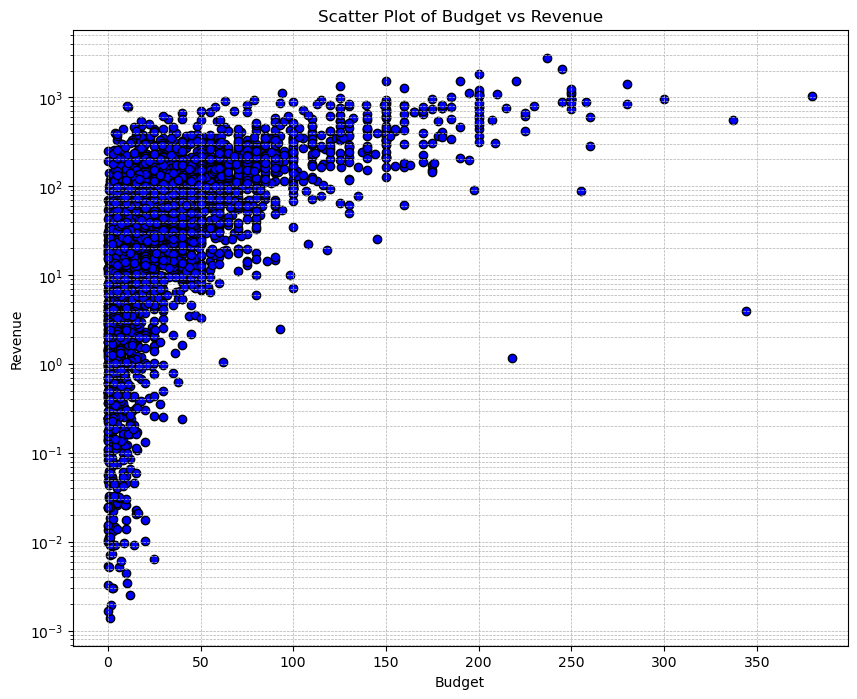

In [1387]:
plt.figure(figsize=(10, 8))

# Scatter plot
plt.scatter(
    filtered_movies['budget'],
    filtered_movies['revenue'],
    color='blue',
    marker='o',
    edgecolor='black'
)


plt.yscale('log') 
# Add labels and title
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Budget vs Revenue')

# Add grid lines for both major and minor ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

The relationship between budget and revenue is not a straight line. It suggests that the connection between how much money is spent on a movie and how much money it earns is not straightforward. This implies that other elements besides the budget play a significant role in determining a movie's financial success.

## Find the main actors director and producer of the movie
Since the data does not include information on the main actors, producer, and director, we can utilize the OpenAI App to obtain these details.

In [139]:
%%time

# Get the API key from the environment variable
openai.api_key = os.getenv('OPENAI_API_KEY')

def get_movie_info(title, genre_names):
    # Query for both main actors and director
    query = f"Provide the names of the main actors, the director, and the producer for the movie titled '{title}' in a single response."
    
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "user", "content": query}
            ],
            max_tokens=150,
            timeout=600
        )

        # Extract the content from the response
        content = response.choices[0].message['content'].strip()

        # Debugging: Print the response content
        print(f"Response content for '{title}': {content}")

        # Initialize variables
        main_actors = None
        director = None
        producer = None

        # Check and parse the response content
        if 'Main actors:' in content:
            parts = content.split('Main actors:')
            if len(parts) > 1:
                main_actors = parts[1].split('Director:')[0].strip()
            
        if 'Director:' in content:
            parts = content.split('Director:')
            if len(parts) > 1:
                if 'Producer:' in parts[1]:
                    director = parts[1].split('Producer:')[0].strip()
                    producer = parts[1].split('Producer:')[1].strip()
                else:
                    director = parts[1].strip()

        # Create the Series with the correct index
        return pd.Series([main_actors, director, producer], index=['main_actors', 'director', 'producer'])

    except Exception as e:
        print(f"Error retrieving data for {title}: {e}")
        # Create the Series with the correct index even in case of an error
        return pd.Series([None, None, None], index=['main_actors', 'director', 'producer'])

def process_batches(df, batch_size):
    results = []
    for start in range(0, len(df), batch_size):
        end = start + batch_size
        batch = df.iloc[start:end]
        batch_results = batch.apply(lambda row: get_movie_info(row['original_title'], row['genre_names']), axis=1)
        results.append(batch_results)
        time.sleep(5)  # Sleep to avoid rate limits
    return pd.concat(results, ignore_index=True)


# Process in batches of 10
batch_size = 10
movie_info = process_batches(filtered_movies, batch_size)


Response content for 'Jumanji': Main actors: Robin Williams, Kirsten Dunst, Bonnie Hunt, Jonathan Hyde
Director: Joe Johnston
Producer: William Teitler, Scott Kroopf, Ted Field, Larry Franco
Response content for 'Waiting to Exhale': Main actors: Whitney Houston, Angela Bassett, Loretta Devine, Lela Rochon
Director: Forest Whitaker
Producer: Terry McMillan, Deborah Schindler, and Ronald Bass
Response content for 'Heat': Main actors: Al Pacino, Robert De Niro
Director: Michael Mann
Producer: Arnon Milchan
Response content for 'Sudden Death': Main actors: Jean-Claude Van Damme, Powers Boothe
Director: Peter Hyams
Producer: Howard Baldwin
Response content for 'GoldenEye': Main actors: Pierce Brosnan, Sean Bean, Izabella Scorupco

Director: Martin Campbell

Producer: Michael G. Wilson, Barbara Broccoli
Response content for 'The American President': Main Actors: Michael Douglas, Annette Bening, Martin Sheen
Director: Rob Reiner
Producer: Rob Reiner, Andrew Lazar
Response content for 'Nixon':

In [ ]:
movie_info['index'] = np.arange(len(movie_info))
filtered_movies['index'] = np.arange(len(filtered_movies))

In [167]:
filtered_movies = filtered_movies.merge(movie_info, on='index')
filtered_movies                                      

,original_language,original_title,popularity,budget,revenue,vote_average,vote_count,genre_names,production_company_names,production_country_names,index,main_actors_x,director_x,producer_x,main_actors_y,director_y,producer_y,main_actors,director,producer
0,en,Jumanji,17.015539,65.0,262.797249,6.9,2413.0,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Communications",United States of America,0,"Robin Williams, Kirsten Dunst, Bonnie Hunt, Jonathan Hyde",Joe Johnston,"William Teitler, Scott Kroopf, Ted Field, Larry Franco","Robin Williams, Kirsten Dunst, Bonnie Hunt, Jonathan Hyde",Joe Johnston,"William Teitler, Scott Kroopf, Ted Field, Larry Franco","Robin Williams, Kirsten Dunst, Bonnie Hunt, Jonathan Hyde",Joe Johnston,"William Teitler, Scott Kroopf, Ted Field, Larry Franco"
1,en,Waiting to Exhale,3.859495,16.0,81.452156,6.1,34.0,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,United States of America,1,"Whitney Houston, Angela Bassett, Loretta Devine, Lela Rochon",Forest Whitaker,"Terry McMillan, Deborah Schindler, and Ronald Bass","Whitney Houston, Angela Bassett, Loretta Devine, Lela Rochon",Forest Whitaker,"Terry McMillan, Deborah Schindler, and Ronald Bass","Whitney Houston, Angela Bassett, Loretta Devine, Lela Rochon",Forest Whitaker,"Terry McMillan, Deborah Schindler, and Ronald Bass"
2,en,Heat,17.924927,60.0,187.436818,7.7,1886.0,"Action, Crime, Drama, Thriller","Regency Enterprises, Forward Pass, Warner Bros.",United States of America,2,"Al Pacino, Robert De Niro",Michael Mann,Arnon Milchan,"Al Pacino, Robert De Niro",Michael Mann,Arnon Milchan,"Al Pacino, Robert De Niro",Michael Mann,Arnon Milchan
3,en,Sudden Death,5.23158,35.0,64.350171,5.5,174.0,"Action, Adventure, Thriller","Universal Pictures, Imperial Entertainment, Signature Entertainment",United States of America,3,"Jean-Claude Van Damme, Powers Boothe",Peter Hyams,Howard Baldwin,"Jean-Claude Van Damme, Powers Boothe",Peter Hyams,Howard Baldwin,"Jean-Claude Van Damme, Powers Boothe",Peter Hyams,Howard Baldwin
4,en,GoldenEye,14.686036,58.0,352.194034,6.6,1194.0,"Adventure, Action, Thriller","United Artists, Eon Productions","United Kingdom, United States of America",4,"Pierce Brosnan, Sean Bean, Izabella Scorupco",Martin Campbell,"Michael G. Wilson, Barbara Broccoli","Pierce Brosnan, Sean Bean, Izabella Scorupco",Martin Campbell,"Michael G. Wilson, Barbara Broccoli","Pierce Brosnan, Sean Bean, Izabella Scorupco",Martin Campbell,"Michael G. Wilson, Barbara Broccoli"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,en,Transformers: The Last Knight,39.186819,260.0,604.942143,6.2,1440.0,"Action, Science Fiction, Thriller, Adventure","Paramount Pictures, Di Bonaventura Pictures, Angry Films, Hasbro Studios",United States of America,4542,"Mark Wahlberg, Anthony Hopkins, Josh Duhamel",Michael Bay,"Don Murphy, Tom DeSanto, Lorenzo di Bonaventura, Ian Bryce","Mark Wahlberg, Anthony Hopkins, Josh Duhamel",Michael Bay,"Don Murphy, Tom DeSanto, Lorenzo di Bonaventura, Ian Bryce","Mark Wahlberg, Anthony Hopkins, Josh Duhamel",Michael Bay,"Don Murphy, Tom DeSanto, Lorenzo di Bonaventura, Ian Bryce"
4543,en,The Dark Tower,50.903593,60.0,71.000000,5.7,688.0,"Action, Western, Science Fiction, Fantasy, Horror","Imagine Entertainment, Weed Road Pictures, Media Rights Capital, Sony Pictures Entertainment","South Africa, United States of America",4543,"Idris Elba, Matthew McConaughey",Nikolaj Arcel,"Akiva Goldsman, Ron Howard, Erica Huggins, Stephen King","Idris Elba, Matthew McConaughey",Nikolaj Arcel,"Akiva Goldsman, Ron Howard, Erica Huggins, Stephen King","Idris Elba, Matthew McConaughey",Nikolaj Arcel,"Akiva Goldsman, Ron Howard, Erica Huggins, Stephen King"
4544,en,Wind River,40.796775,11.0,184.770205,7.4,181.0,"Action, Crime, Mystery, Thriller","Thunder Road Pictures, Star Thrower Entertainment, Acacia Filmed Entertainment","United Kingdom, United States of America, Canada",4544,Jeremy Renner and

## Clean the data from the fields where we don't have values for 'main_actors','director' and 'producer'

In [173]:
filtered_movies = filtered_movies.dropna(subset=['main_actors','director','producer'])
filtered_movies.shape[0]

4079

In [718]:
# filtered_movies.to_csv("movies_actor_dir_pr_new.csv", index=False)

## Parsing and cleaning the names for main actors, director(s) and producer(s)

In [754]:
filtered_movies['main_actors'] = filtered_movies['main_actors'].apply(lambda x: x.strip() if isinstance(x, str) else x)
filtered_movies['director'] = filtered_movies['director'].apply(lambda x: x.strip() if isinstance(x, str) else x)
filtered_movies['producer'] = filtered_movies['producer'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [756]:
def clean_names(names_string):
    if isinstance(names_string, str):
        # Remove leading hyphens and spaces
        names_cleaned = names_string.replace('- ', '')
        # Replace newlines with commas and spaces
        names_cleaned = names_cleaned.replace('\n', ', ')
        # Remove extra spaces
        names_cleaned = names_cleaned.strip()
        return names_cleaned
    return names_string

In [758]:
filtered_movies['main_actors'] = filtered_movies['main_actors'].apply(clean_names)
filtered_movies['producer'] = filtered_movies['producer'].apply(clean_names)
filtered_movies['director'] = filtered_movies['director'].apply(clean_names)

In [760]:
filtered_movies

,original_language,original_title,popularity,budget,revenue,vote_average,vote_count,genre_names,production_company_names,production_country_names,index,main_actors_y,director_y,producer_y,main_actors,director,producer
0,en,Jumanji,17.015539,65.0,262.797249,6.9,2413.0,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Communications",United States of America,0,"Robin Williams, Kirsten Dunst, Bonnie Hunt, Jonathan Hyde",Joe Johnston,"William Teitler, Scott Kroopf, Ted Field, Larry Franco","Robin Williams, Kirsten Dunst, Bonnie Hunt, Jonathan Hyde",Joe Johnston,"William Teitler, Scott Kroopf, Ted Field, Larry Franco"
1,en,Waiting to Exhale,3.859495,16.0,81.452156,6.1,34.0,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,United States of America,1,"Whitney Houston, Angela Bassett, Loretta Devine, Lela Rochon",Forest Whitaker,"Terry McMillan, Deborah Schindler, and Ronald Bass","Whitney Houston, Angela Bassett, Loretta Devine, Lela Rochon",Forest Whitaker,"Terry McMillan, Deborah Schindler, and Ronald Bass"
2,en,Heat,17.924927,60.0,187.436818,7.7,1886.0,"Action, Crime, Drama, Thriller","Regency Enterprises, Forward Pass, Warner Bros.",United States of America,2,"Al Pacino, Robert De Niro",Michael Mann,Arnon Milchan,"Al Pacino, Robert De Niro",Michael Mann,Arnon Milchan
3,en,Sudden Death,5.231580,35.0,64.350171,5.5,174.0,"Action, Adventure, Thriller","Universal Pictures, Imperial Entertainment, Signature Entertainment",United States of America,3,"Jean-Claude Van Damme, Powers Boothe",Peter Hyams,Howard Baldwin,"Jean-Claude Van Damme, Powers Boothe",Peter Hyams,Howard Baldwin
4,en,GoldenEye,14.686036,58.0,352.194034,6.6,1194.0,"Adventure, Action, Thriller","United Artists, Eon Productions","United Kingdom, United States of America",4,"Pierce Brosnan, Sean Bean, Izabella Scorupco",Martin Campbell,"Michael G. Wilson, Barbara Broccoli","Pierce Brosnan, Sean Bean, Izabella Scorupco",Martin Campbell,"Michael G. Wilson, Barbara Broccoli"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,en,Transformers: The Last Knight,39.186819,260.0,604.942143,6.2,1440.0,"Action, Science Fiction, Thriller, Adventure","Paramount Pictures, Di Bonaventura Pictures, Angry Films, Hasbro Studios",United States of America,4542,"Mark Wahlberg, Anthony Hopkins, Josh Duhamel",Michael Bay,"Don Murphy, Tom DeSanto, Lorenzo di Bonaventura, Ian Bryce","Mark Wahlberg, Anthony Hopkins, Josh Duhamel",Michael Bay,"Don Murphy, Tom DeSanto, Lorenzo di Bonaventura, Ian Bryce"
4075,en,The Dark Tower,50.903593,60.0,71.000000,5.7,688.0,"Action, Western, Science Fiction, Fantasy, Horror","Imagine Entertainment, Weed Road Pictures, Media Rights Capital, Sony Pictures Entertainment","South Africa, United States of America",4543,"Idris Elba, Matthew McConaughey",Nikolaj Arcel,"Akiva Goldsman, Ron Howard, Erica Huggins, Stephen King","Idris Elba, Matthew McConaughey",Nikolaj Arcel,"Akiva Goldsman, Ron Howard, Erica Huggins, Stephen King"
4076,en,Wind River,40.796775,11.0,184.770205,7.4,181.0,"Action, Crime, Mystery, Thriller","Thunder Road Pictures, Star Thrower Entertainment, Acacia Filmed Entertainment","United Kingdom, United States of America, Canada",4544,Jeremy Renner and Elizabeth Olsen,Taylor Sheridan,Elizabeth A. Bell,Jeremy Renner and Elizabeth Olsen,Taylor Sheridan,Elizabeth A. Bell
4077,en,Dikari,0.903061,0.8,1.328612,5.8,6.0,"Comedy, Drama",NaN,NaN,4545,"Pratik Gandhi, Deeksha Joshi",Krishnadev Yagnik,Arpan Pandya,"Pratik Gandhi, Deeksha Joshi",Krishnadev Yagnik,Arpan Pandya


## Expand the data frame for all the names of actors, directors and producers in order to calculate the individual contribution of all participants

In [1179]:
df_expanded_1 = filtered_movies.assign(main_actors=filtered_movies_1['main_actors'].str.split(',')).explode('main_actors')

In [1181]:
df_expanded_2 = df_expanded_1.assign(director=df_expanded_1['director'].str.split(',')).explode('director')

In [766]:
df_expanded = df_expanded_2.assign(producer=df_expanded_2['producer'].str.split(',')).explode('producer')
df_expanded = df_expanded[['original_title','genre_names','main_actors','director','producer','revenue','budget']] 	
df_expanded

,original_title,genre_names,main_actors,director,producer,revenue,budget
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,William Teitler,262.797249,65.0
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,Scott Kroopf,262.797249,65.0
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,Ted Field,262.797249,65.0
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,Larry Franco,262.797249,65.0
0,Jumanji,"Adventure, Fantasy, Family",Kirsten Dunst,Joe Johnston,William Teitler,262.797249,65.0
...,...,...,...,...,...,...,...
4077,Dikari,"Comedy, Drama",Deeksha Joshi,Krishnadev Yagnik,Arpan Pandya,1.328612,0.8
4078,ÐÑÐ¾ Ð»ÑÐ±Ð¾ff,"Romance, Drama",Evgeny Tsyganov,Roman Prygunov,Sergey Selyanov,1.268793,2.0
4078,ÐÑÐ¾ Ð»ÑÐ±Ð¾ff,"Romance, Drama",Yulia Snigir,Roman Prygunov,Sergey Selyanov,1.268793,2.0
4078,ÐÑÐ¾ Ð»ÑÐ±Ð¾ff,"Romance, Drama",Alexander Pal,Roman Prygunov,Sergey Selyanov,1.268793,2.0


Variables such as popularity and votes become available only after a movie is released, making them unsuitable as predictors for the test set. Therefore, they are not included in the subsequent analysis.

In [768]:
df_expanded = df_expanded[df_expanded['original_title']!='ÐÑÐ¾ Ð»ÑÐ±Ð¾ff']
df_expanded

,original_title,genre_names,main_actors,director,producer,revenue,budget
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,William Teitler,262.797249,65.0
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,Scott Kroopf,262.797249,65.0
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,Ted Field,262.797249,65.0
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,Larry Franco,262.797249,65.0
0,Jumanji,"Adventure, Fantasy, Family",Kirsten Dunst,Joe Johnston,William Teitler,262.797249,65.0
...,...,...,...,...,...,...,...
4075,The Dark Tower,"Action, Western, Science Fiction, Fantasy, Horror",Matthew McConaughey,Nikolaj Arcel,Erica Huggins,71.000000,60.0
4075,The Dark Tower,"Action, Western, Science Fiction, Fantasy, Horror",Matthew McConaughey,Nikolaj Arcel,Stephen King,71.000000,60.0
4076,Wind River,"Action, Crime, Mystery, Thriller",Jeremy Renner and Elizabeth Olsen,Taylor Sheridan,Elizabeth A. Bell,184.770205,11.0
4077,Dikari,"Comedy, Drama",Pratik Gandhi,Krishnadev Yagnik,Arpan Pandya,1.328612,0.8


In [770]:
df_expanded = df_expanded[df_expanded['main_actors']!='-']
df_expanded.shape[0]

16761

In [772]:
df_expanded = df_expanded.dropna()

## Calculate how profitable is a given movie 
Movies are considered successful if their revenue exceeds their budget; otherwise, they are deemed unsuccessful.

In [774]:
df_expanded['profit'] = df_expanded['revenue'] - df_expanded['budget']

In [778]:
df_expanded['success'] = np.where(df_expanded['profit']>0, 'Successfull', 'Not Successfull')

# Split the data on the train and test set
The data is divided so that movies in the training set don't appear in the test set. However, actors or producers featured in the test set movies may also be present in the training set movies. Keeping the movies in the test set entirely separate from those in the training set ensures that our predictor is evaluated fairly. The predictor learns from past movies, but it tests its predictions on new, unseen movies. The effectiveness of these predictions is assessed based on how well the success factors of the participants, as learned from the training data, correlate with the success of the new movies. 

In simpler terms, if a new movie is made by experienced producers and directors who have shown success in the past, and features lead actors who have starred in financially successful movies, then there's a strong likelihood that this new movie will also achieve success.

In this approach, we assumed that the movies in the training set were released before those in the test set.


In [1214]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = df_expanded.copy()

# Function to get movies with any of the specified actors, directors, or producers
def get_movies_with_entities(df, entities, column_name):
    if len(entities) > 0:
        # Join entities into a single regex pattern and check if they appear in the specified column
        pattern = '|'.join(entities)
        # Create a mask for movies containing any of the entities
        mask = df[column_name].str.contains(pattern, regex=True, na=False)
        return df[mask]
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no entities are provided

# Extract unique values from each entity column
all_actors = pd.unique(df['main_actors'])
all_directors = pd.unique(df['director'])
all_producers = pd.unique(df['producer'])

# Ensure entity lists are not array-like objects that could cause ambiguity
all_actors = list(all_actors)
all_directors = list(all_directors)
all_producers = list(all_producers)

# Extract movies where actors, directors, or producers are present
movies_with_actors = get_movies_with_entities(df, all_actors, 'main_actors')
movies_with_directors = get_movies_with_entities(df, all_directors, 'director')
movies_with_producers = get_movies_with_entities(df, all_producers, 'producer')

# Combine all relevant movies (union of movies from actors, directors, and producers)
movies_with_entities = pd.concat([movies_with_actors, movies_with_directors, movies_with_producers]).drop_duplicates()

# Extract unique movie titles
unique_titles = movies_with_entities['original_title'].unique()

# Split the unique titles into train and test sets
train_titles, test_titles = train_test_split(
    unique_titles, 
    test_size=0.2, 
    random_state=42
)

# Create train and test DataFrames based on movie titles
train_movies = movies_with_entities[movies_with_entities['original_title'].isin(train_titles)]
test_movies = movies_with_entities[movies_with_entities['original_title'].isin(test_titles)]

# Print the number of movies in train and test sets
print(f"Number of movies in train set: {len(train_movies)}")
print(f"Number of movies in test set: {len(test_movies)}")

# Remove any possible overlap in movies between train and test sets
train_movies = train_movies.drop_duplicates(subset='original_title')
test_movies = test_movies.drop_duplicates(subset='original_title')

# Print the number of unique movies to ensure no overlap
print(f"Unique movies in train set: {len(train_movies['original_title'].unique())}")
print(f"Unique movies in test set: {len(test_movies['original_title'].unique())}")


/var/folders/s9/50q4dtjx43v2thzdkrbxn8hh0000gn/T/ipykernel_75750/3761495791.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df[column_name].str.contains(pattern, regex=True, na=False)


Number of movies in train set: 13475
Number of movies in test set: 3251
Unique movies in train set: 3197
Unique movies in test set: 800


### Verify that there is no data leakage.

In [1216]:
test_movies[test_movies['original_title'].isin(train_movies['original_title'])].shape[0]

0

## Calculate the success factor of the actors, directors and producers in the train set
The success factor is determined by the difference between the number of profitable movies and unsuccessful ones. Therefore, if an actor appears in more profitable movies, their success factor will be higher.

The success factor computed from the training set is assigned to the actors, directors, and producers who appear in both the training and test sets. For actors, directors, and producers not present in the training set whose history is unknown, the success factor is assigned a value of zero.

In [829]:
df_expanded_train = df_expanded[df_expanded['original_title'].isin(train_titles)]
df_expanded_train

,original_title,genre_names,main_actors,director,producer,revenue,budget,profit,success
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,William Teitler,262.797249,65.0,197.797249,Successfull
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,Scott Kroopf,262.797249,65.0,197.797249,Successfull
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,Ted Field,262.797249,65.0,197.797249,Successfull
0,Jumanji,"Adventure, Fantasy, Family",Robin Williams,Joe Johnston,Larry Franco,262.797249,65.0,197.797249,Successfull
0,Jumanji,"Adventure, Fantasy, Family",Kirsten Dunst,Joe Johnston,William Teitler,262.797249,65.0,197.797249,Successfull
...,...,...,...,...,...,...,...,...,...
4074,Transformers: The Last Knight,"Action, Science Fiction, Thriller, Adventure",Josh Duhamel,Michael Bay,Tom DeSanto,604.942143,260.0,344.942143,Successfull
4074,Transformers: The Last Knight,"Action, Science Fiction, Thriller, Adventure",Josh Duhamel,Michael Bay,Lorenzo di Bonaventura,604.942143,260.0,344.942143,Successfull
4074,Transformers: The Last Knight,"Action, Science Fiction, Thriller, Adventure",Josh Duhamel,Michael Bay,Ian Bryce,604.942143,260.0,344.942143,Successfull
4077,Dikari,"Comedy, Drama",Pratik Gandhi,Krishnadev Yagnik,Arpan Pandya,1.328612,0.8,0.528612,Successfull


In [1219]:
def calculate_success_factor(df, group_by_columns, metric_column='success', factor_suffix='actor'):
    """
    Calculates the success factor for a given group-by columns (e.g., genre_names and actors, directors, producers).

    Parameters:
    - df: pd.DataFrame - The DataFrame containing the movie data.
    - group_by_columns: list - A list of column names to group by (e.g., ['genre_names', 'main_actors']).
    - metric_column: str - The column name that indicates success (default is 'success').
    - factor_suffix: str - Suffix to use for naming the success factor column (e.g., 'actor', 'director', 'producer').

    Returns:
    - pd.DataFrame - DataFrame with success factor calculations.
    """
    # Group by the specified columns and aggregate success with value_counts
    df_expanded = df.groupby(group_by_columns)[metric_column].value_counts().unstack(fill_value=0)

    # Reset the index to flatten the DataFrame
    df_expanded = df_expanded.reset_index()

    # Ensure 'Successfull' and 'Not Successfull' columns are present
    if 'Successfull' not in df_expanded.columns:
        df_expanded['Successfull'] = 0
    if 'Not Successfull' not in df_expanded.columns:
        df_expanded['Not Successfull'] = 0

    # Sort by the number of successful movies in descending order
    df_expanded = df_expanded.sort_values(by='Successfull', ascending=False)

    # Calculate success factor as the difference between successful and unsuccessful movies
    success_factor_column = f'success_factor_{factor_suffix}'
    df_expanded[success_factor_column] = df_expanded['Successfull'] - df_expanded['Not Successfull']

    return df_expanded

# Example usage
df_expanded_actors = calculate_success_factor(df_expanded_train, ['genre_names', 'main_actors'], factor_suffix='actor')
df_expanded_directors = calculate_success_factor(df_expanded_train, ['genre_names', 'director'], factor_suffix='director')
df_expanded_producers = calculate_success_factor(df_expanded_train, ['genre_names', 'producer'], factor_suffix='producer')


In [1255]:
df_expanded_train_actors = df_expanded_train.merge(df_expanded_actors, on=['genre_names','main_actors'])

In [1257]:
df_expanded_train_dir = df_expanded_train_actors.merge(df_expanded_directors, on=['genre_names','director'])

In [1259]:
df_expanded_train_full = df_expanded_train_dir.merge(df_expanded_producers, on=['genre_names','producer'])

In [1227]:
df_factor = df_expanded_train_full[['main_actors','director','producer','success_factor_actor',
                                          'success_factor_director', 'success_factor_producer']]

In [1279]:
df_expanded_test = df_expanded[df_expanded['original_title'].isin(test_titles)]

In [1231]:
df_expanded_test_full = df_expanded_test.merge(df_factor,on=['main_actors','director','producer'], how='left', indicator=True)

In [1233]:
df_expanded_test_full['_merge'].value_counts()

_merge
both          2811
left_only      604
right_only       0
Name: count, dtype: int64

In [1235]:
# Convert categorical columns to strings
categorical_columns = df_expanded_test_full.select_dtypes(include=['category']).columns
df_expanded_test_full[categorical_columns] = df_expanded_test_full[categorical_columns].astype(str)

# Fill missing values
df_expanded_test_full = df_expanded_test_full.fillna(0)


# 1. ML (Classification) model for predicting the success of the movie

LinearSVC classification model is chosen for ML to predict the succes of the movie. The target variable is 'success' and the predictors are: 'genre_names', 'main_actors', 'director', 'producer', 'success_factor_actor', 'success_factor_director', 'success_factor_producer'.

Linear Support Vector Classification (LinearSVC) is a popular choice for classification tasks, including predicting the success of movies, due to several key advantages:

1. High Efficiency with Large Datasets:
        Scalability: LinearSVC is particularly efficient for large datasets with many features. It scales well with the number of samples and features, making it suitable for real-world applications with extensive datasets.
        Training Speed: It generally has faster training times compared to non-linear models, especially when dealing with high-dimensional data.

2. Effective with High-Dimensional Data:
        Feature Space Handling: LinearSVC performs well in high-dimensional spaces, where the number of features exceeds the number of samples. This is common in tasks like text classification or movie success prediction where there are numerous categorical features (e.g., actors, directors).

3. Simplicity and Interpretability:
        Model Simplicity: Linear models are simpler and easier to interpret than complex non-linear models. The coefficients of the model can provide insights into the importance of different features in predicting success.
        Feature Importance: The weights assigned to features in a linear model can be directly interpreted as feature importance, which can be useful for understanding which factors are driving predictions.

4. Robustness to Overfitting:
        Regularization: LinearSVC includes built-in regularization (via the C parameter) that helps prevent overfitting. This is particularly beneficial when working with datasets that have many features or are prone to noise.

5. Good Performance with Linearly Separable Data:
        Optimal Decision Boundary: For problems where the classes are linearly separable or approximately so, LinearSVC can efficiently find a decision boundary that separates different classes with minimal error.

6. Flexibility with Loss Functions:
        Loss Function Choices: LinearSVC allows the use of different loss functions (e.g., hinge loss), which can be advantageous depending on the specific characteristics of the dataset and the problem being addressed.

7. Handling Sparse Data:
        Sparse Input Handling: LinearSVC can efficiently handle sparse data, which is often the case with text data or datasets where many features are binary or categorical.

In [1412]:
def fit_and_evaluate_classifier(train_df, test_df):
    """
    Fits a LinearSVC classification model on the training data and evaluates it on the test data.

    Parameters:
    - train_df: pd.DataFrame - The training DataFrame containing features and target variable.
    - test_df: pd.DataFrame - The test DataFrame containing features and target variable.

    Returns:
    - accuracy: float - Accuracy score of the model on the test set.
    - report: str - Classification report of the model on the test set.
    - cm: ndarray - Confusion matrix of the model on the test set.
    - y_test: pd.Series - True values of the target variable for the test set.
    - y_pred: np.ndarray - Predicted values of the target variable for the test set.
    - pipeline: Pipeline - The fitted pipeline object.
    """
    try:
        # Define features and target variable
        X_train = train_df.drop(columns=['success'])
        y_train = train_df['success']
        X_test = test_df.drop(columns=['success'])
        y_test = test_df['success']

        # Define categorical features
        categorical_features = ['genre_names', 'main_actors', 'director', 'producer', 
                                'success_factor_actor', 'success_factor_director', 
                                'success_factor_producer']

        # Define preprocessing for categorical features
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ])

        # Create a ColumnTransformer that applies the preprocessing to categorical features
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', categorical_transformer, categorical_features)
            ])

        # Define the model
        model = LinearSVC()

        # Create the pipeline with preprocessing and modeling
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])

        # Fit the model
        pipeline.fit(X_train, y_train)

        # Predict on the test set
        y_pred = pipeline.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        return accuracy, report, cm, y_test, y_pred, pipeline
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None, None, None, None

if __name__ == "__main__":
    
    # Fit the model and get metrics
    accuracy, report, cm, y_test, y_pred, pipeline = fit_and_evaluate_classifier(df_expanded_train_full, df_expanded_test_full)

    # Print the results
    if accuracy is not None and report is not None:
        print(f"Accuracy: {accuracy}")
        print("Classification Report:")
        print(report)
        print("Confusion Matrix:")
        print(cm)


Accuracy: 0.9411420204978038
Classification Report:
                 precision    recall  f1-score   support

Not Successfull       0.94      0.84      0.89       953
    Successfull       0.94      0.98      0.96      2462

       accuracy                           0.94      3415
      macro avg       0.94      0.91      0.92      3415
   weighted avg       0.94      0.94      0.94      3415

Confusion Matrix:
[[ 800  153]
 [  48 2414]]


## Count the number of unique movie titles that were predicted correctly and incorrectly

In [1297]:
df_expanded_test_full['predicted'] = y_pred
df_expanded_test_full.head(50)

,original_title,genre_names,main_actors,director,producer,revenue,budget,profit,success,success_factor_actor,success_factor_director,success_factor_producer,_merge,predicted
0,Cutthroat Island,"Action, Adventure",Geena Davis,Renny Harlin,Joel B. Michaels,10.017322,98.000000,-87.982678,Not Successfull,0.0,0.0,0.0,left_only,Successfull
1,Cutthroat Island,"Action, Adventure",Matthew Modine,Renny Harlin,Joel B. Michaels,10.017322,98.000000,-87.982678,Not Successfull,0.0,0.0,0.0,left_only,Successfull
2,Sense and Sensibility,"Drama, Romance",Emma Thompson,Ang Lee,Lindsay Doran,135.000000,16.500000,118.500000,Successfull,1.0,4.0,4.0,both,Successfull
3,Sense and Sensibility,"Drama, Romance",Kate Winslet,Ang Lee,Lindsay Doran,135.000000,16.500000,118.500000,Successfull,8.0,4.0,4.0,both,Successfull
4,Sense and Sensibility,"Drama, Romance",Hugh Grant,Ang Lee,Lindsay Doran,135.000000,16.500000,118.500000,Successfull,1.0,4.0,4.0,both,Successfull
5,Sense and Sensibility,"Drama, Romance",Alan Rickman,Ang Lee,Lindsay Doran,135.000000,16.500000,118.500000,Successfull,1.0,4.0,4.0,both,Successfull
6,Get Shorty,"Comedy, Thriller, Crime",John Travolta,Barry Sonnenfeld,Danny DeVito,115.101622,30.250000,84.851622,Successfull,0.0,0.0,0.0,left_only,Successfull
7,Get Shorty,"Comedy, Thriller, Crime",Gene Hackman,Barry Sonnenfeld,Danny DeVito,115.101622,30.250000,84.851622,Successfull,0.0,0.0,0.0,left_only,Successfull
8,Get Shorty,"Comedy, Thriller, Crime",Rene Russo,Barry Sonnenfeld,Danny DeVito,115.101622,30.250000,84.851622,Successfull,0.0,0.0,0.0,left_only,Successfull
9,Get Shorty,"Comedy, Thriller, Crime",Danny DeVito,Barry Sonnenfeld,Danny DeVito,115.101622,30.250000,84.851622,Successfull,0.0,0.0,0.0,left_only,Successfull


In [1299]:
# Group by 'original_title' and get the majority prediction for each movie
df_test_grouped = df_expanded_test_full.groupby('original_title').agg({
    'success': 'first',  
    'predicted': lambda x: x.mode()[0]  # Majority vote for prediction
}).reset_index()

# Check classification correctness
df_test_grouped['correctly_classified'] = df_test_grouped['success'] == df_test_grouped['predicted']

# Calculate counts of correctly and incorrectly classified movies
correctly_classified_count = df_test_grouped['correctly_classified'].sum()
incorrectly_classified_count = len(df_test_grouped) - correctly_classified_count

print(f"Number of unique movies correctly classified: {correctly_classified_count}")
print(f"Number of unique movies incorrectly classified: {incorrectly_classified_count}")


Number of unique movies correctly classified: 742
Number of unique movies incorrectly classified: 58


In [1301]:
df_test_grouped

,original_title,success,predicted,correctly_classified
0,10 to Midnight,Successfull,Successfull,True
1,15 Minutes,Not Successfull,Not Successfull,True
2,16 Blocks,Successfull,Successfull,True
3,2 Days in New York,Not Successfull,Not Successfull,True
4,2 Fast 2 Furious,Successfull,Successfull,True
...,...,...,...,...
795,Zaytoun,Not Successfull,Not Successfull,True
796,Zero Effect,Not Successfull,Not Successfull,True
797,Zombadings 1: Patayin sa Shokot si Remington,Successfull,Successfull,True
798,Zoom,Not Successfull,Not Successfull,True


In [1015]:
true_labels = df_test_grouped['success']
predicted_labels = df_test_grouped['predicted']

# Print the classification report
print(classification_report(true_labels, predicted_labels))

                 precision    recall  f1-score   support

Not Successfull       0.95      0.81      0.87       242
    Successfull       0.92      0.98      0.95       558

       accuracy                           0.93       800
      macro avg       0.93      0.89      0.91       800
   weighted avg       0.93      0.93      0.93       800



In [1313]:
print(confusion_matrix(true_labels, predicted_labels))

[[195  47]
 [ 11 547]]


# 2. ML model (Regression) for predicting the revenue of the movie

Ridge regression is a popular method in statistics and machine learning for dealing with regression problems, especially when dealing with multicollinearity or when the number of features is large compared to the number of observations. Here are some reasons why one might choose Ridge regression:
1. Handling Multicollinearity
Multicollinearity occurs when predictor variables are highly correlated. This can make the coefficients of the regression model unstable and lead to high variance in predictions.
Ridge regression addresses this by adding a penalty term to the cost function. This penalty term shrinks the coefficients of correlated predictors towards zero, thus reducing their variance and stabilizing the model.

3. Improving Model Performance
Regular linear regression can lead to overfitting, especially when the model is too complex relative to the amount of training data.
Ridge regression includes a regularization term that penalizes large coefficients, which can help improve the model's performance on unseen data by reducing overfitting.

5. Regularization
Concept: Regularization involves adding a penalty to the loss function to constrain or regularize the coefficients of the model.
Implementation in Ridge: Ridge regression uses L2 regularization, which adds the squared magnitude of the coefficients (multiplied by a regularization parameter) to the loss function. This helps to prevent the coefficients from becoming too large and overfitting the data.

7. Improving Model Stability
By penalizing the size of the coefficients, Ridge regression tends to produce more stable and robust models, which are less sensitive to fluctuations in the training data.

8. Effective with Many Features
When the number of features is very large, Ridge regression helps manage the impact of each feature by reducing the size of the coefficients.
This can be particularly useful in high-dimensional datasets where traditional regression models may perform poorly due to overfitting.

9. Ease of Use
Implementation: Ridge regression is straightforward to implement and tune. The regularization parameter αα controls the strength of the penalty, and finding an optimal αα can be done via cross-validation.

10. Computational Efficiency
Performance: Ridge regression can be computationally efficient, especially when using optimized libraries or algorithms for large-scale problems.

In [1570]:
def fit_regression_model(X_train, X_test, y_train, y_test, model_type='ridge', alpha=1.0):
    """
    Fits a Ridge or Lasso regression model and returns MSE and R2 score.

    Parameters:
    - X_train: pd.DataFrame - The training feature set.
    - X_test: pd.DataFrame - The testing feature set.
    - y_train: pd.Series - The training target variable.
    - y_test: pd.Series - The testing target variable.
    - model_type: str - The type of regression model to use ('ridge' or 'lasso').
    - alpha: float - The regularization strength (lambda) for Ridge/Lasso regression.

    Returns:
    - mse: Mean Squared Error on the test set.
    - r2: R2 score on the test set.
    """
    try:
        # Define categorical and numeric features
        categorical_features = ['genre_names','main_actors', 'director', 'producer', 
                                'success_factor_actor', 'success_factor_director', 
                                'success_factor_producer']
        numeric_features = ['budget']

        # Define preprocessing for numeric and categorical features
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())  # Standardize numeric features
        ])

        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])

        # Choose model
        if model_type == 'ridge':
            model = Ridge(alpha=alpha)
        elif model_type == 'lasso':
            model = Lasso(alpha=alpha)
        else:
            raise ValueError("Invalid model_type. Choose 'ridge' or 'lasso'.")

        # Create the pipeline with preprocessing and modeling
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])

        # Fit the model
        pipeline.fit(X_train, y_train)

        # Predict on the test set
        y_pred = pipeline.predict(X_test)

        # Save the model pipeline
        joblib.dump(pipeline, 'movie_success_model.pkl')

        # Compute Mean Squared Error and R2 Score
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        return mse, r2
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

if __name__ == "__main__":

    X_train = df_expanded_train_full.drop(columns=['revenue'])
    y_train = df_expanded_train_full['revenue']
    X_test =  df_expanded_test_full.drop(columns=['revenue'])
    y_test =  df_expanded_test_full['revenue']

    # Fit the model and get metrics
    mse, r2 = fit_regression_model(X_train, X_test, y_train, y_test, model_type='ridge', alpha=1.0)

    # Print the results
    if mse is not None and r2 is not None:
        print(f"Mean Squared Error: {mse}")
        print(f"R2 Score: {r2}")
    else:
        print("Error: Could not compute metrics.")


Mean Squared Error: 3751.6712217908052
R2 Score: 0.8843291934910409


The R² score of 0.884 indicates that our model explains about 88.4% of the variability in movie revenue based on the input features. This means our predictions for movie revenue are quite accurate, capturing a substantial portion of the revenue trends.

However, when predicting whether a movie will be successful (a binary outcome like success/failure), our model achieves an accuracy of 94%. This higher accuracy suggests that our model is even more reliable in classifying a movie's success or failure compared to predicting its revenue.

In simpler terms:

88% accuracy in predicting revenue means the model does a good job of forecasting the amount of money a movie will make, but there's still some room for improvement.

94% accuracy in predicting success means the model is very effective at determining whether a movie will be successful or not, with fewer errors compared to revenue predictions.

So, while the revenue prediction model is effective, the success prediction model is more precise, providing better performance in terms of classification accuracy.



## Find the best performers

In [1444]:
def aggregate_feature_importance(feature_importance):
    """
    Aggregates feature importance by feature type.

    Parameters:
    - feature_importance: dict - Feature importance scores.

    Returns:
    - aggregated_importance: dict - Aggregated feature importance scores by feature type.
    """
    aggregated_importance = {'actor': {}, 'director': {}, 'producer': {}, 'genre': {}}

    # Define feature types for aggregation (assuming feature names contain these indicators)
    for feature_name, importance in feature_importance.items():
        if 'main_actors' in feature_name:
            actor_name = feature_name.replace('main_actors_', '')
            aggregated_importance['actor'][actor_name] = aggregated_importance['actor'].get(actor_name, 0) + importance
        elif feature_name.startswith('director'):
            director_name = feature_name.replace('director_', '')
            aggregated_importance['director'][director_name] = aggregated_importance['director'].get(director_name, 0) + importance
        elif feature_name.startswith('producer'):
            producer_name = feature_name.replace('producer_', '')
            aggregated_importance['producer'][producer_name] = aggregated_importance['producer'].get(producer_name, 0) + importance
        elif 'genre_names' in feature_name:
            genre_name = feature_name.replace('genre_names_', '')
            aggregated_importance['genre'][genre_name] = aggregated_importance['genre'].get(genre_name, 0) + importance
            
    return aggregated_importance

def get_top_features(aggregated_importance, top_n=3):
    """
    Gets the top N features by aggregated importance.

    Parameters:
    - aggregated_importance: dict - Aggregated feature importance scores by feature type.
    - top_n: int - Number of top features to return.

    Returns:
    - top_features: dict - Top features by aggregated importance.
    """
    top_features = {}
    
    for category, features in aggregated_importance.items():
        # Sort and select top_n features
        top_features[category] = sorted(features.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    return top_features

if __name__ == "__main__":
        
    aggregated_importance = aggregate_feature_importance(feature_importance)

    # Get and print the top features
    top_features = get_top_features(aggregated_importance, top_n=3)
    print("\nTop 3 Top Performers:")
    for category, features in top_features.items():
        print(f"\nTop {category}s:")
        for name, importance in features:
            print(f"  {name}: {importance:.4f}")
else:
    print("Error: Could not compute metrics.")



Top 3 Top Performers:

Top actors:
  Sam Worthington: 313.1091
  Leonardo DiCaprio and Kate Winslet: 286.8629
   Jeff Goldblum: 175.4522

Top directors:
  James Wan: 486.3252
  James Cameron: 473.9093
  Colin Trevorrow: 403.4708

Top producers:
   Jon Landau: 613.1745
  Seth MacFarlane: 274.8268
  William Peter Blatty: 244.7321

Top genres:
  Action, Adventure, Science Fiction, Fantasy: 861.0344
  Family, Fantasy, Adventure: 526.5175
  Action, Adventure, Fantasy, Science Fiction: 443.5488


# Dream cast for the next blockbuster

1. Main actors: Sam Worthington, Leonardo DiCaprio and Kate Winslet
2. Director: James Cameron
3. Producer: Jon Landau
4. Genre: Action, Adventure, Science Fiction, Fantasy
5. Budget: 50M
6. Predicted revenue: $1170M

In [1562]:
# Load the pipeline
pipeline = joblib.load('movie_success_model.pkl')

# Prepare test data
test_data = {
    'genre_names': ['Action, Adventure, Fantasy, Science Fiction'] * 3,
    'main_actors': ['Sam Worthington', 'Leonardo DiCaprio', 'Kate Winslet'],
    'director': ['James Cameron'] * 3,
    'producer': ['Jon Landau'] * 3,
    'budget': [50, 50, 50],
    'success_factor_actor': [7, 113, 22],
    'success_factor_director': [67] * 3,
    'success_factor_producer': [0] * 3
}
test_df = pd.DataFrame(test_data)

# Predict using the loaded pipeline
predicted_revenue = pipeline.predict(test_df).mean()
print(f"Predicted Revenue: ${predicted_revenue.tolist()}")


Predicted Revenue: $1170.3474654609076


# Limitations of the model
Several factors may influence the accuracy of the model:

1. Temporal Assumptions: The model presumes that the movies in the training set are historically older than those in the test set. However, this assumption might not always hold true, as we have not incorporated a time frame variable into the model. The absence of temporal data means that the model does not account for the chronological evolution of movie success, potentially impacting its accuracy.

2. Incomplete Data on Participants: We lack information on the performance of all participants in the test set. For those whose success factors are unknown, we assigned a default value of zero. In reality, some of these participants could be highly successful, and the model’s predictions might be less accurate due to this data gap. A more comprehensive dataset with complete performance information would likely improve prediction accuracy.

3. External Influences: Factors such as marketing campaigns and critics reviews after the first screening, which can significantly affect a movie’s success and return on investment (ROI), are not accounted for in the model. These elements often come into play after the initial predictions are made and are not available at the time of prediction. Their exclusion from the model means that while predictions of whether a movie will be profitable or successful can be reasonably accurate, forecasting precise revenue or ROI is inherently more challenging, resulting in lower accuracy of the regression model.

These considerations collectively impact the model’s accuracy. While it aims to provide a fair assessment of a movie’s potential success, predicting exact revenue or ROI remains more complex and subject to external influences that are not captured in the current model.